El siguiente codigo es capaz de generar archivos mp4

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D

# Lorentz 1963
$$ \dot x = \sigma ( y - x) $$
$$ \dot y = x ( \rho  - z) - y $$
$$ \dot z = x y - \beta z $$

para la forma de mariposa se utilizan las constantes como:
$$ \{\sigma, \beta, \rho\} = \{10, 8/3, 28\} $$

como observaras las variables estan entre mezcladas por tanto nuestra implementacion de euler no podra ser, pues hemos de actualizar cada variable entremedio y comunicar los datos, por ello solo utilizaremos un 1 step

In [6]:
r0 = [0, 1, 10] 

sigma, beta, rho = 10, 8/3, 28

In [7]:
def lorentz(t, r):
    dr = [  sigma * ( r[1] - r[0]),
            r[0] * (rho - r[2]) - r[1],
            r[0] * r[1] - beta * r[2]   ]
    return np.array(dr)

In [8]:
def RK4_1step(f, t, r, dt): # 
    k1 = dt*f(t, r)
    k2 = dt*f(t + dt/2, r + k1/2)
    k3 = dt*f(t + dt/2, r + k2/2)
    k4 = dt*f(t + dt, r + k3)
    return r + (k1 + 2*k2 + 2*k3 + k4)/6

In [9]:
# condiciones iniciales
r0 = [-7, 7, 28]

# trayectoria de tiempo
t0 = 0
T  = 30 # por cuanto simular tf = T + t0
dt = 0.01
t = np.arange(t0, t0 + T, dt)
N_t = len(t)

In [10]:
R = np.zeros((3, N_t))
R[:,0] = r0

for i in range(1,N_t):
    R[:,i] = RK4_1step(lorentz, t[i], R[:,i-1], dt)


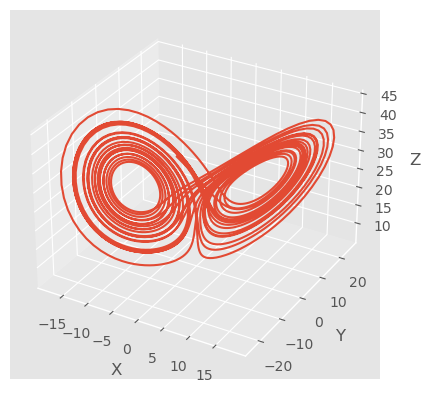

In [11]:
%matplotlib inline
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(R[0], R[1], R[2])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

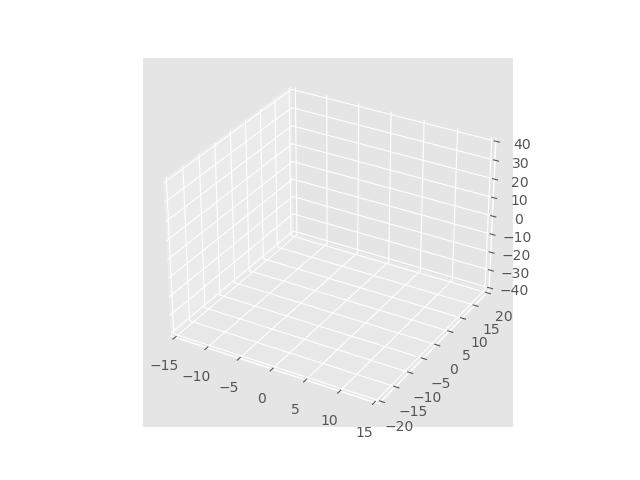

In [18]:
%matplotlib widget
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

plt.style.use('ggplot')

ax.set_xlim(-15,15)
ax.set_zlim(-40,40)
ax.set_ylim(-20,20)

def update(i):
    ax.clear()
    ax.plot(R[0,:i], R[1,:i], R[2,:i], color= 'blue', lw = 0.8)

ani = animation.FuncAnimation(fig, update, frames=int(N_t/2), 
        interval = 1000/60, repeat = False, cache_frame_data=False)
plt.show()

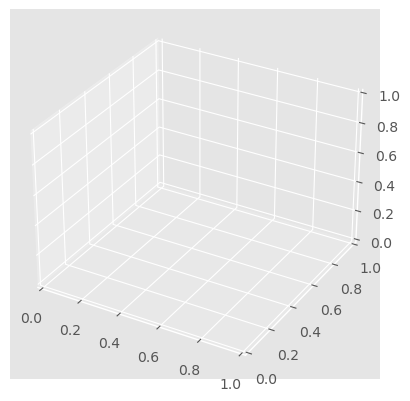

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

plt.style.use('ggplot')

def update(i):
    ax.clear()
    ax.plot(R[0,:i], R[1,:i], R[2,:i], color= 'blue', lw = 0.8)
    ax.set_xlim(-15,15)
    ax.set_zlim(0,40)
    ax.set_ylim(-20,20)


genera varios archivos para entonces hacer este proceso mas ligero para la memoria

In [14]:
slices = 5
DeltaN = int(N_t/slices)
for j in range(slices):
    ani = animation.FuncAnimation(fig, update, frames=range(j*DeltaN,(j+1)*DeltaN), 
            interval = 1000/60, repeat = False, cache_frame_data=False)

    ani.save(f"something_{j}.mp4")